# Objectives:


* create an interactive space for farmers to inquire about weather and planting conditions for optimal crop planting weather/ seasons
* display climate and geographical information 

## About this project:


#### EDA:

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



#### Processes:
* .head() - allows us to view the first five items iin the database
* .shape - shows us the rows and columns 
* .isna().sum() - calculates the colum valuse with null values
* .drop() - allows us to drop columns that are not being used to reduce clutter and improve useabillity
* .fillna(0) - replaces the null values with "0"
* .describe() - shows a statistical summary of the dataset


#### Kenya-weather-data-gyga-format:   LARGE FILE!!


In [3]:
weather_data = pd.read_excel('datasets/Kenya-weather-data-gyga-format.xlsx',sheet_name='Kenya')
weather_data.head()

,station_id,country,DOY,date,year,month,day,srad,tmax,tmin,...,srad_inf,tmin_inf,tmax_inf,rain_inf,rh_inf,wind_inf,vp_inf,tdew_inf,sunhrs_inf,et_inf
0,9000000,Kenya,1,1992-01-01,1992,1,1,23.0,23.9,11.3,...,gridded,observed,observed,observed,gridded,assumed constant,NaN,NaN,NaN,NaN
1,9000000,Kenya,2,1992-01-02,1992,1,2,23.0,26.1,13.1,...,gridded,observed,observed,observed,gridded,assumed constant,NaN,NaN,NaN,NaN
2,9000000,Kenya,3,1992-01-03,1992,1,3,22.0,26.0,12.6,...,gridded,observed,observed,observed,gridded,assumed constant,NaN,NaN,NaN,NaN
3,9000000,Kenya,4,1992-01-04,1992,1,4,21.0,25.0,12.6,...,gridded,observed,observed,observed,gridded,assumed constant,NaN,NaN,NaN,NaN
4,9000000,Kenya,5,1992-01-05,1992,1,5,27.0,22.4,12.2,...,gridded,observed,observed,observed,gridded,assumed constant,NaN,NaN,NaN,NaN


In [4]:
#dropping null columns to clean the data and reduce unecessary columns
weather_data= weather_data.drop(columns=["srad_inf", "tmin_inf", "tmax_inf", "rain_inf", "rh_inf", "wind_inf", "vp_inf", "tdew_inf", "sunhrs_inf", "et_inf", "wind", "vp", "tdew", "sunhrs", "et"])
weather_data.head()

,station_id,country,DOY,date,year,month,day,srad,tmax,tmin,rain,rh
0,9000000,Kenya,1,1992-01-01,1992,1,1,23.0,23.9,11.3,0.0,57.0
1,9000000,Kenya,2,1992-01-02,1992,1,2,23.0,26.1,13.1,0.0,44.0
2,9000000,Kenya,3,1992-01-03,1992,1,3,22.0,26.0,12.6,0.0,45.0
3,9000000,Kenya,4,1992-01-04,1992,1,4,21.0,25.0,12.6,0.0,49.0
4,9000000,Kenya,5,1992-01-05,1992,1,5,27.0,22.4,12.2,0.0,43.0


In [5]:
len(weather_data['station_id'].value_counts())
#the weather stations are not for each county or very limited number of counties

15

#### Temperature change on land:

In [6]:
tempreature_change = pd.read_csv('datasets/Temperature change on land.csv')
tempreature_change.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,404,Kenya,7271,Temperature change,7001,January,2000,2000,°c,0.208,E,Estimated value
1,ET,Temperature change on land,404,Kenya,7271,Temperature change,7001,January,2001,2001,°c,0.476,E,Estimated value
2,ET,Temperature change on land,404,Kenya,7271,Temperature change,7001,January,2002,2002,°c,1.026,E,Estimated value
3,ET,Temperature change on land,404,Kenya,7271,Temperature change,7001,January,2003,2003,°c,0.797,E,Estimated value
4,ET,Temperature change on land,404,Kenya,7271,Temperature change,7001,January,2004,2004,°c,1.240,E,Estimated value


In [7]:
tempreature_change = tempreature_change.drop(columns=["Domain Code", "Element Code", "Domain", "Area Code (M49)", "Area", "Months Code", "Year Code", "Flag", "Flag Description"])
tempreature_change.head()
# this does not convat longitudonal or latitudonal data hence cannot be used 

,Element,Months,Year,Unit,Value
0,Temperature change,January,2000,°c,0.208
1,Temperature change,January,2001,°c,0.476
2,Temperature change,January,2002,°c,1.026
3,Temperature change,January,2003,°c,0.797
4,Temperature change,January,2004,°c,1.240


# Loading geospacial data


In [8]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [9]:
temperature = pd.read_csv("geological_data/Temperature at 2 Meters.csv")
temperature.head()

,PARAMETER,YEAR,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,T2M,2000,-0.5,33.750,25.78,25.78,25.38,25.16,24.97,24.03,23.77,23.81,24.83,24.07,23.67,24.42,24.64
1,T2M,2000,-0.5,34.375,25.47,26.00,25.88,25.25,24.98,24.32,23.70,23.81,24.64,23.95,23.38,23.32,24.55
2,T2M,2000,-0.5,35.000,22.27,23.08,23.30,22.20,21.69,20.57,19.77,20.22,20.98,21.17,20.69,20.35,21.35
3,T2M,2000,-0.5,35.625,16.31,16.87,17.85,16.67,16.10,14.53,13.67,13.92,14.82,15.54,15.43,15.53,15.60
4,T2M,2000,-0.5,36.250,16.61,17.30,18.35,17.05,16.40,14.83,14.02,14.03,15.12,15.88,15.89,16.53,16.00


In [10]:
precipitation = pd.read_csv("geological_data/precipitation average.csv")
precipitation.head()

,PARAMETER,YEAR,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,PRECTOTCORR,2000,-0.5,33.750,1.13,2.06,2.72,5.89,4.43,1.57,2.20,3.88,4.42,5.99,6.88,6.28,3.96
1,PRECTOTCORR,2000,-0.5,34.375,0.71,1.84,2.26,4.04,2.91,1.38,1.70,2.69,3.31,5.87,5.48,6.72,3.25
2,PRECTOTCORR,2000,-0.5,35.000,0.62,1.47,2.17,3.31,2.45,1.41,1.93,2.52,2.88,4.96,5.64,5.19,2.88
3,PRECTOTCORR,2000,-0.5,35.625,0.33,0.65,1.36,2.90,1.74,1.45,2.45,3.29,2.55,3.26,4.95,2.52,2.29
4,PRECTOTCORR,2000,-0.5,36.250,0.30,0.30,0.88,2.47,1.39,1.42,2.45,3.45,2.15,2.10,3.74,1.86,1.88


In [11]:
Soil_Wetness = pd.read_csv("geological_data/Zone Soil Wetness (surface to 100 cm below).csv")
Soil_Wetness.head()

,PARAMETER,YEAR,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,GWETROOT,2000,-0.5,34.375,0.56,0.52,0.52,0.56,0.57,0.54,0.53,0.54,0.54,0.61,0.69,0.77,0.58
1,GWETROOT,2000,-0.5,35.000,0.51,0.48,0.49,0.51,0.51,0.49,0.49,0.50,0.51,0.54,0.60,0.65,0.52
2,GWETROOT,2000,-0.5,35.625,0.43,0.41,0.41,0.43,0.43,0.42,0.43,0.45,0.45,0.45,0.48,0.47,0.44
3,GWETROOT,2000,-0.5,36.250,0.38,0.37,0.36,0.39,0.38,0.38,0.39,0.41,0.41,0.40,0.42,0.40,0.39
4,GWETROOT,2000,-0.5,36.875,0.40,0.37,0.36,0.39,0.38,0.37,0.38,0.39,0.39,0.38,0.41,0.41,0.39


### Transforming long lat into geodataframe

In [12]:
# Create geometry column from LON and LAT
geometry = [Point(xy) for xy in zip(precipitation['LON'], precipitation['LAT'])]

# Create GeoDataFrame
gdf_precipitation = gpd.GeoDataFrame(precipitation, geometry=geometry)

# Set coordinate system (WGS84 for lat/lon)
gdf_precipitation.set_crs(epsg=4326, inplace=True)
gdf_precipitation.head()

,PARAMETER,YEAR,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,geometry
0,PRECTOTCORR,2000,-0.5,33.750,1.13,2.06,2.72,5.89,4.43,1.57,2.20,3.88,4.42,5.99,6.88,6.28,3.96,POINT (33.75000 -0.50000)
1,PRECTOTCORR,2000,-0.5,34.375,0.71,1.84,2.26,4.04,2.91,1.38,1.70,2.69,3.31,5.87,5.48,6.72,3.25,POINT (34.37500 -0.50000)
2,PRECTOTCORR,2000,-0.5,35.000,0.62,1.47,2.17,3.31,2.45,1.41,1.93,2.52,2.88,4.96,5.64,5.19,2.88,POINT (35.00000 -0.50000)
3,PRECTOTCORR,2000,-0.5,35.625,0.33,0.65,1.36,2.90,1.74,1.45,2.45,3.29,2.55,3.26,4.95,2.52,2.29,POINT (35.62500 -0.50000)
4,PRECTOTCORR,2000,-0.5,36.250,0.30,0.30,0.88,2.47,1.39,1.42,2.45,3.45,2.15,2.10,3.74,1.86,1.88,POINT (36.25000 -0.50000)


In [13]:
# Create geometry column from LON and LAT
geometry = [Point(xy) for xy in zip(temperature['LON'], temperature['LAT'])]

# Create GeoDataFrame
gdf_temperature = gpd.GeoDataFrame(temperature, geometry=geometry)

# Set coordinate system (WGS84 for lat/lon)
gdf_temperature.set_crs(epsg=4326, inplace=True)
gdf_temperature.head()

,PARAMETER,YEAR,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,geometry
0,T2M,2000,-0.5,33.750,25.78,25.78,25.38,25.16,24.97,24.03,23.77,23.81,24.83,24.07,23.67,24.42,24.64,POINT (33.75000 -0.50000)
1,T2M,2000,-0.5,34.375,25.47,26.00,25.88,25.25,24.98,24.32,23.70,23.81,24.64,23.95,23.38,23.32,24.55,POINT (34.37500 -0.50000)
2,T2M,2000,-0.5,35.000,22.27,23.08,23.30,22.20,21.69,20.57,19.77,20.22,20.98,21.17,20.69,20.35,21.35,POINT (35.00000 -0.50000)
3,T2M,2000,-0.5,35.625,16.31,16.87,17.85,16.67,16.10,14.53,13.67,13.92,14.82,15.54,15.43,15.53,15.60,POINT (35.62500 -0.50000)
4,T2M,2000,-0.5,36.250,16.61,17.30,18.35,17.05,16.40,14.83,14.02,14.03,15.12,15.88,15.89,16.53,16.00,POINT (36.25000 -0.50000)


In [14]:
# Create geometry column from LON and LAT
geometry = [Point(xy) for xy in zip(Soil_Wetness['LON'], Soil_Wetness['LAT'])]
# Create GeoDataFrame
gdf_Soil_Wetness = gpd.GeoDataFrame(Soil_Wetness, geometry=geometry)
# Set coordinate system (WGS84 for lat/lon)
gdf_Soil_Wetness.set_crs(epsg=4326, inplace=True)
gdf_Soil_Wetness.head()

,PARAMETER,YEAR,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,geometry
0,GWETROOT,2000,-0.5,34.375,0.56,0.52,0.52,0.56,0.57,0.54,0.53,0.54,0.54,0.61,0.69,0.77,0.58,POINT (34.37500 -0.50000)
1,GWETROOT,2000,-0.5,35.000,0.51,0.48,0.49,0.51,0.51,0.49,0.49,0.50,0.51,0.54,0.60,0.65,0.52,POINT (35.00000 -0.50000)
2,GWETROOT,2000,-0.5,35.625,0.43,0.41,0.41,0.43,0.43,0.42,0.43,0.45,0.45,0.45,0.48,0.47,0.44,POINT (35.62500 -0.50000)
3,GWETROOT,2000,-0.5,36.250,0.38,0.37,0.36,0.39,0.38,0.38,0.39,0.41,0.41,0.40,0.42,0.40,0.39,POINT (36.25000 -0.50000)
4,GWETROOT,2000,-0.5,36.875,0.40,0.37,0.36,0.39,0.38,0.37,0.38,0.39,0.39,0.38,0.41,0.41,0.39,POINT (36.87500 -0.50000)


# PROCESSING GEOJSON FILES:


In [15]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install --upgrade fiona


  Using cached fiona-1.10.1-cp312-cp312-win_amd64.whl.metadata (58 kB)
Using cached fiona-1.10.1-cp312-cp312-win_amd64.whl (24.5 MB)
  Attempting uninstall: fiona
    Found existing installation: fiona 1.9.6
    Uninstalling fiona-1.9.6:
      Successfully uninstalled fiona-1.9.6
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --upgrade fiona


Note: you may need to restart the kernel to use updated packages.


In [18]:
import fiona
print(fiona.__version__)


1.10.1


In [19]:
!pip install rasterio
#using rasterio to process our geotiff files and images

   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/25.4 MB 2.1 MB/s eta 0:00:12
   - -------------------------------------- 1.0/25.4 MB 1.9 MB/s eta 0:00:13
   -- ------------------------------------- 1.6/25.4 MB 2.3 MB/s eta 0:00:11
   --- ------------------------------------ 2.4/25.4 MB 2.4 MB/s eta 0:00:10
   ---- ----------------------------------- 2.9/25.4 MB 2.5 MB/s eta 0:00:10
   ----- ---------------------------------- 3.4/25.4 MB 2.6 MB/s eta 0:00:09
   ------ --------------------------------- 4.2/25.4 MB 2.6 MB/s eta 0:00:09
   ------- -------------------------------- 4.5/25.4 MB 2.6 MB/s eta 0:00:08
   -------- ------------------------------- 5.2/25.4 MB 2.7 MB/s eta 0:00:08
   --------- ------------------------------ 5.8/25.4 MB 2.6 MB/s eta 0:00:08
   --------- -------

In [20]:
import geopandas as gpd
import rasterio
from rasterio.plot import show, show_hist
rasterio.__version__

'1.4.3'

## Reading files


#### Creating a function to help load data quicker and take up less space

In [21]:
def processing_data(filepath): #allows us to open the data with necesarry information without repetition
    data = rasterio.open(filepath)
    print(data)
    array_data = data.read()
    print(f"""this is an array of the data: 
    {array_data}
    """) #the data is in a numpy array that the library knows how to transform into satelite images
    print(f"""this is the data information on the image 
    {data.meta}
    """)
    num_bands = data.count
    print(f"""the number of bands in this image: {num_bands}""") # this shows the number of bands/layers in the image

    show(data) #displays the image 
    
    
    show_hist(data, bins=50, title='histogram') # converts image data into a histogram
    
    

c:\Users\ericg\anaconda3\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


<open DatasetReader name='ksa_data/Kenya Crop Mask 2019.tiff' mode='r'>
this is an array of the data: 
    [[[2 2 2 ... 2 2 2]
  [2 2 2 ... 2 2 2]
  [2 2 2 ... 2 2 2]
  ...
  [2 2 2 ... 2 2 2]
  [2 2 2 ... 2 2 2]
  [2 2 2 ... 2 2 2]]]
    
this is the data information on the image 
    {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 800, 'height': 1013, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
    
the number of bands in this image: 1


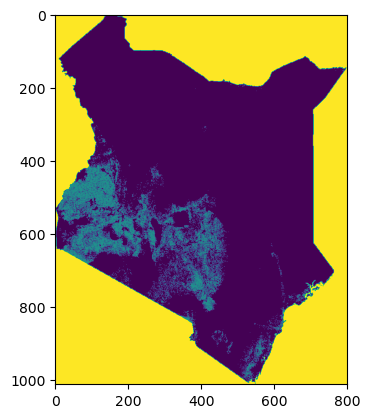

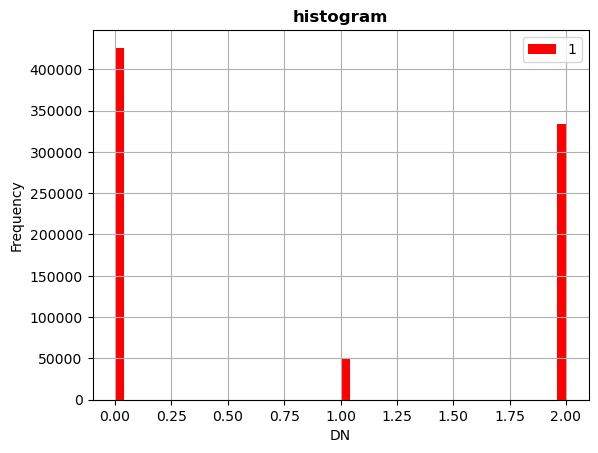

In [22]:
processing_data("ksa_data/Kenya Crop Mask 2019.tiff")

<open DatasetReader name='ksa_data/Kenya NDVI 2022.tiff' mode='r'>
this is an array of the data: 
    [[[253 253 253 ... 253 253 253]
  [253 253 253 ... 253 253 253]
  [253 253 253 ... 253 253 253]
  ...
  [253 253 253 ... 253 253 253]
  [253 253 253 ... 253 253 253]
  [253 253 253 ... 253 253 253]]]
    
this is the data information on the image 
    {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 800, 'height': 1013, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
    
the number of bands in this image: 1


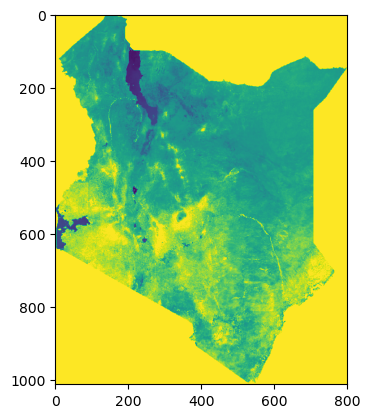

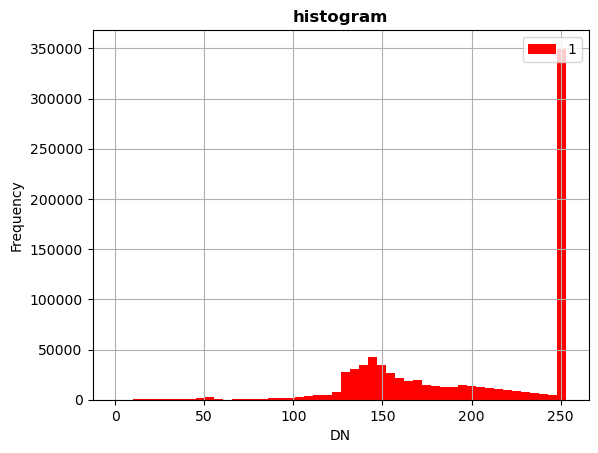

In [23]:
processing_data("ksa_data/Kenya NDVI 2022.tiff")

<open DatasetReader name='ksa_data/Kenya Soil Degradation Data.tiff' mode='r'>
this is an array of the data: 
    [[[249 249 249 ... 249 249 249]
  [249 249 249 ... 249 249 249]
  [249 249 249 ... 249 249 249]
  ...
  [249 249 249 ... 249 249 249]
  [249 249 249 ... 249 249 249]
  [249 249 249 ... 249 249 249]]]
    
this is the data information on the image 
    {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 800, 'height': 1010, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
    
the number of bands in this image: 1


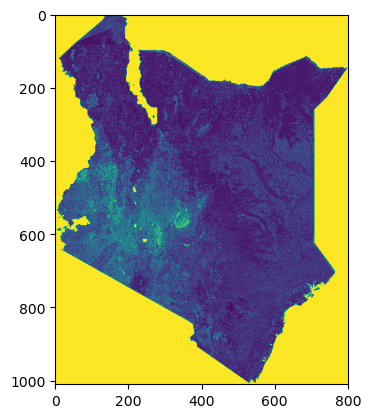

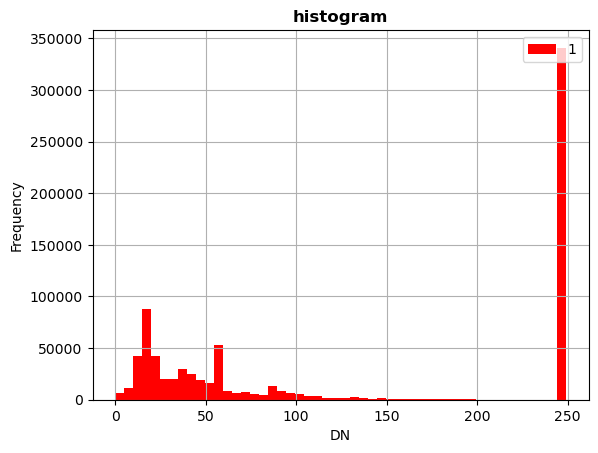

In [24]:
processing_data("ksa_data/Kenya Soil Degradation Data.tiff")

<open DatasetReader name='ksa_data/Kenya Soil Texture Types.tiff' mode='r'>
this is an array of the data: 
    [[[253 253 253 ... 253 253 253]
  [253 253 253 ... 253 253 253]
  [253 253 253 ... 253 253 253]
  ...
  [253 253 253 ... 253 253 253]
  [253 253 253 ... 253 253 253]
  [253 253 253 ... 253 253 253]]]
    
this is the data information on the image 
    {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 800, 'height': 1010, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
    
the number of bands in this image: 1


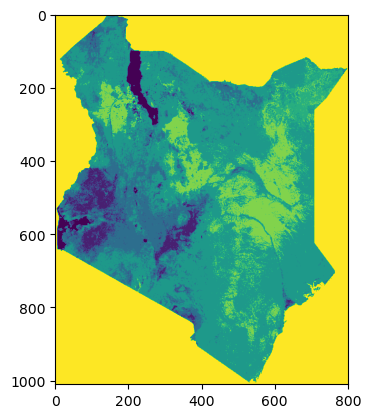

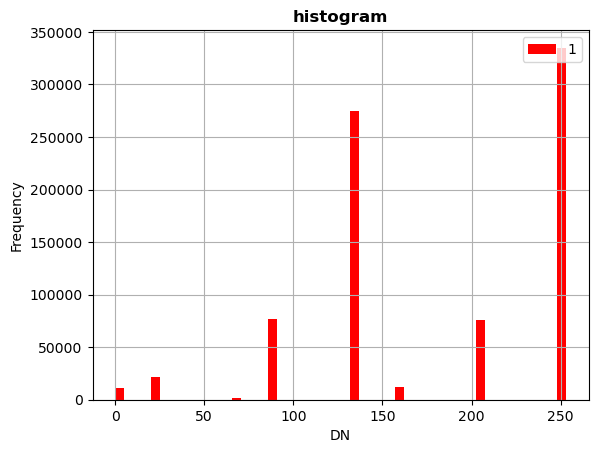

In [25]:
processing_data("ksa_data/Kenya Soil Texture Types.tiff")

<open DatasetReader name='ksa_data/Kenya_CropType_EndOfSeason_LongRains_2021.tiff' mode='r'>
this is an array of the data: 
    [[[10 10 10 ... 10 10 10]
  [10 10 10 ... 10 10 10]
  [10 10 10 ... 10 10 10]
  ...
  [10 10 10 ... 10 10 10]
  [10 10 10 ... 10 10 10]
  [10 10 10 ... 10 10 10]]]
    
this is the data information on the image 
    {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 800, 'height': 602, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
    
the number of bands in this image: 1


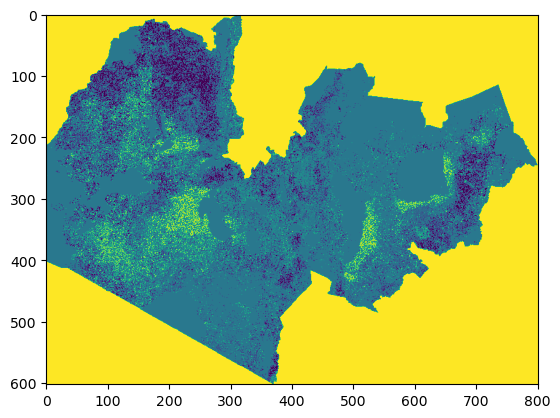

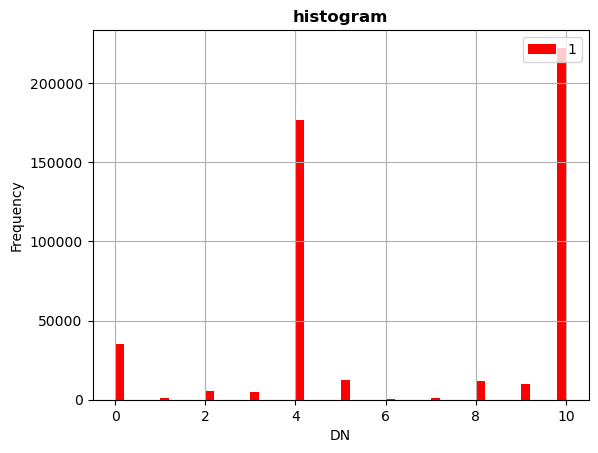

In [26]:
processing_data("ksa_data/Kenya_CropType_EndOfSeason_LongRains_2021.tiff")

<open DatasetReader name='ksa_data/Kenya_CropType_EndOfSeason_LongRains_2023.tiff' mode='r'>
this is an array of the data: 
    [[[10 10 10 ... 10 10 10]
  [10 10 10 ... 10 10 10]
  [10 10 10 ... 10 10 10]
  ...
  [10 10 10 ... 10 10 10]
  [10 10 10 ... 10 10 10]
  [10 10 10 ... 10 10 10]]]
    
this is the data information on the image 
    {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 800, 'height': 751, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
    
the number of bands in this image: 1


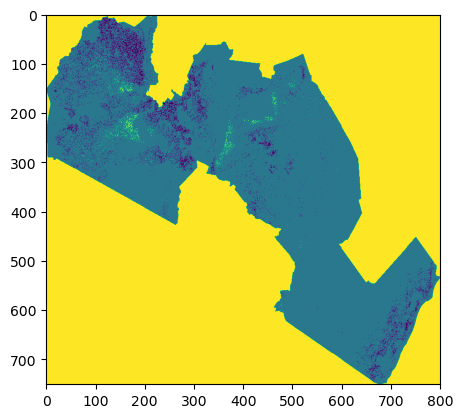

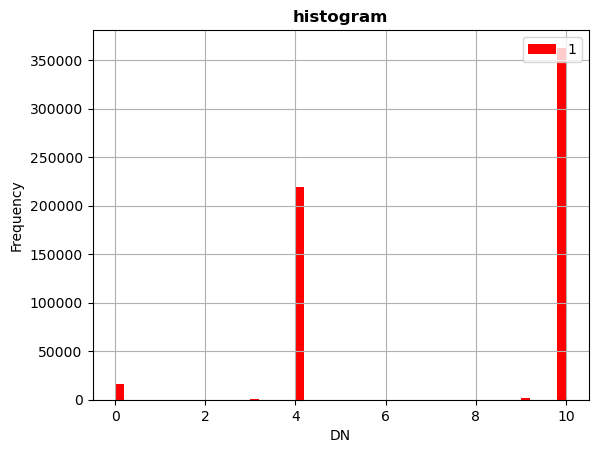

In [27]:
processing_data("ksa_data/Kenya_CropType_EndOfSeason_LongRains_2023.tiff")

<open DatasetReader name='ksa_data/Kenya_CropType_InSeason_ShortRains_2022-2023.tiff' mode='r'>
this is an array of the data: 
    [[[10 10 10 ... 10 10 10]
  [10 10 10 ... 10 10 10]
  [10 10 10 ... 10 10 10]
  ...
  [10 10 10 ... 10 10 10]
  [10 10 10 ... 10 10 10]
  [10 10 10 ... 10 10 10]]]
    
this is the data information on the image 
    {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 800, 'height': 751, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
    
the number of bands in this image: 1


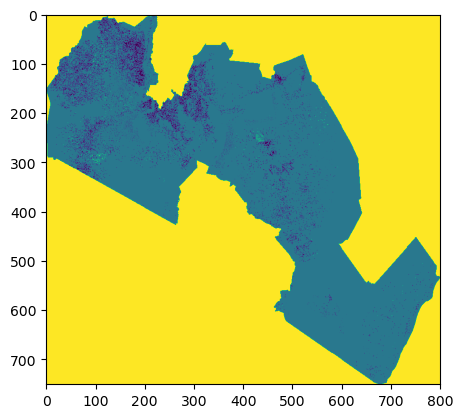

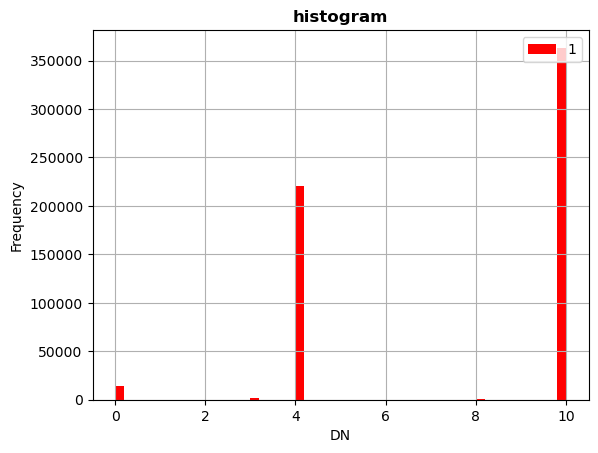

In [28]:
croptype = processing_data("ksa_data/Kenya_CropType_InSeason_ShortRains_2022-2023.tiff")
croptype

A DN value in an NDVI raster might correspond to vegetation index levels (e.g. greener = higher DN)

In a crop mask, DN values could represent presence or absence of crops or specific crop types

For soil or degradation maps, different DNs might map to soil classes or condition levels

In [29]:
data = rasterio.open("ksa_data/Kenya_CropType_InSeason_ShortRains_2022-2023.tiff")
data

<open DatasetReader name='ksa_data/Kenya_CropType_InSeason_ShortRains_2022-2023.tiff' mode='r'>

In [30]:
# raster_path = "ksa_data/Kenya_CropType_InSeason_ShortRains_2022-2023.tiff"
# raster = rasterio.open(raster_path)

# fig, ax = plt.subplots(figsize=(10, 10))
# show(raster, ax=ax, title='Kenya Crop Type Map')

# shape files 

In [31]:
!pip install geopandas

In [32]:
!pip install fiona


In [33]:
import geopandas as gpd
data = gpd.read_file("KEN/AgroMaps/Africa/shapefiles/KEN/admin1/ken.shp")
data.head()


,UNCODEOR,CNTNAME3,COUNTRY_NA,CNTCODE_,NAME1_,PCODE,COMMENTS_,geometry
0,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,None,"POLYGON ((36.25160 -0.12465, 36.25330 -0.12057..."
1,404.0,KEN,Kenya,114.0,COAST,KEN002,None,"MULTIPOLYGON (((37.69361 -3.16358, 37.78766 -3..."
2,404.0,KEN,Kenya,114.0,EASTERN,KEN003,None,"POLYGON ((36.05642 3.68088, 36.06246 3.74481, ..."
3,404.0,KEN,Kenya,114.0,N. EASTERN,KEN004,None,"POLYGON ((38.68931 0.50363, 38.69806 0.50279, ..."
4,404.0,KEN,Kenya,114.0,NAIROBI,KEN005,None,"POLYGON ((36.67882 -1.30289, 36.68127 -1.29845..."


In [34]:
data.shape

(8, 8)

In [35]:
data2 = gpd.read_file("KEN/AgroMaps/Africa/shapefiles/KEN/admin2/ken.shp")
data2.head()

,UNCODEOR,CNTNAME3,COUNTRY_NA,CNTCODE_,NAME1_,PCODE,NAME2_,DCODE,COMMENTS_,geometry
0,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,KIAMBU,KEN001001,None,"POLYGON ((36.52517 -1.23252, 36.53603 -1.19584..."
1,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,KIRINYAGA,KEN001002,None,"POLYGON ((37.21025 -0.42827, 37.21194 -0.41933..."
2,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,MURANGA,KEN001003,None,"POLYGON ((36.73126 -0.67027, 36.73064 -0.66761..."
3,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,NYANDARUA,KEN001004,None,"POLYGON ((36.25160 -0.12465, 36.25330 -0.12057..."
4,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,NYERI,KEN001005,None,"POLYGON ((36.60928 -0.32549, 36.61883 -0.31163..."


In [36]:
data2.shape

(47, 10)

In [37]:
data3 = gpd.read_file("KEN/AgroMaps/Africa/shapefiles/KEN/admin1/ken.shp")
data3.head()

,UNCODEOR,CNTNAME3,COUNTRY_NA,CNTCODE_,NAME1_,PCODE,COMMENTS_,geometry
0,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,None,"POLYGON ((36.25160 -0.12465, 36.25330 -0.12057..."
1,404.0,KEN,Kenya,114.0,COAST,KEN002,None,"MULTIPOLYGON (((37.69361 -3.16358, 37.78766 -3..."
2,404.0,KEN,Kenya,114.0,EASTERN,KEN003,None,"POLYGON ((36.05642 3.68088, 36.06246 3.74481, ..."
3,404.0,KEN,Kenya,114.0,N. EASTERN,KEN004,None,"POLYGON ((38.68931 0.50363, 38.69806 0.50279, ..."
4,404.0,KEN,Kenya,114.0,NAIROBI,KEN005,None,"POLYGON ((36.67882 -1.30289, 36.68127 -1.29845..."


In [38]:
data3.shape

(8, 8)

In [39]:
data4 = gpd.read_file("KEN/AgroMaps/Africa/shapefiles/KEN/admin2/ken.shp")
data4.head()

,UNCODEOR,CNTNAME3,COUNTRY_NA,CNTCODE_,NAME1_,PCODE,NAME2_,DCODE,COMMENTS_,geometry
0,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,KIAMBU,KEN001001,None,"POLYGON ((36.52517 -1.23252, 36.53603 -1.19584..."
1,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,KIRINYAGA,KEN001002,None,"POLYGON ((37.21025 -0.42827, 37.21194 -0.41933..."
2,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,MURANGA,KEN001003,None,"POLYGON ((36.73126 -0.67027, 36.73064 -0.66761..."
3,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,NYANDARUA,KEN001004,None,"POLYGON ((36.25160 -0.12465, 36.25330 -0.12057..."
4,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,NYERI,KEN001005,None,"POLYGON ((36.60928 -0.32549, 36.61883 -0.31163..."


In [40]:
data4.shape

(47, 10)

In [41]:
data2 == data4
#both datasets are the same hence i am going to select one for the projects

,UNCODEOR,CNTNAME3,COUNTRY_NA,CNTCODE_,NAME1_,PCODE,NAME2_,DCODE,COMMENTS_,geometry
0,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,False,True
4,True,True,True,True,True,True,True,True,False,True
5,True,True,True,True,True,True,True,True,False,True
6,True,True,True,True,True,True,True,True,False,True
7,True,True,True,True,True,True,True,True,False,True
8,True,True,True,True,True,True,True,True,False,True
9,True,True,True,True,True,True,True,True,False,True


# Analysis


In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
data2 = gpd.read_file("KEN/AgroMaps/Africa/shapefiles/KEN/admin2/ken.shp")
data2.head()

,UNCODEOR,CNTNAME3,COUNTRY_NA,CNTCODE_,NAME1_,PCODE,NAME2_,DCODE,COMMENTS_,geometry
0,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,KIAMBU,KEN001001,None,"POLYGON ((36.52517 -1.23252, 36.53603 -1.19584..."
1,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,KIRINYAGA,KEN001002,None,"POLYGON ((37.21025 -0.42827, 37.21194 -0.41933..."
2,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,MURANGA,KEN001003,None,"POLYGON ((36.73126 -0.67027, 36.73064 -0.66761..."
3,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,NYANDARUA,KEN001004,None,"POLYGON ((36.25160 -0.12465, 36.25330 -0.12057..."
4,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,NYERI,KEN001005,None,"POLYGON ((36.60928 -0.32549, 36.61883 -0.31163..."


In [44]:
data2.plot('NAME2_')

<Axes: >

In [45]:
climate = gpd.read_file("climatezones_shapefile/GYGAClimateZones.shp")
climate.head()

,ID,GYGA_CZ,geometry
0,1,1703,"POLYGON ((-31.59240 83.58921, -31.67573 83.589..."
1,2,1903,"POLYGON ((-32.84232 83.50589, -33.00898 83.505..."
2,3,1603,"POLYGON ((-29.34254 83.50589, -29.75918 83.505..."
3,4,1803,"POLYGON ((-37.84202 83.42256, -38.00867 83.422..."
4,5,1903,"POLYGON ((-37.75869 83.42256, -37.84202 83.422..."


In [46]:
climate.shape

(81746, 3)

In [47]:
climate['GYGA_CZ'].value_counts()

GYGA_CZ
1603     4935
1703     4178
1503     3603
1803     3433
1403     3208
         ... 
10502       4
10602       3
10702       2
10003       1
7303        1
Name: count, Length: 265, dtype: int64

In [49]:
climate.plot('geometry')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [51]:
climate.plot('ID')

<Axes: >

In [50]:
climate.plot('GYGA_CZ')

<Axes: >

In [52]:
# confirm both layers use the same coordinate reference system to avoid errors
print(data2.crs) == print(climate.crs)


GEOGCS["GCS_Assumed_Geographic_1 (deprecated)",DATUM["North_American_Datum_1927",SPHEROID["Clarke 1866",6378206.4,294.978698213898,AUTHORITY["EPSG","7008"]],AUTHORITY["EPSG","6267"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["ESRI","104000"]]
EPSG:4326


True

In [53]:
# Convert climate to match data2's CRS
climate = climate.to_crs(data2.crs)


In [54]:
#Spatial Join with climate Polygon to keep kenyan climate
# Spatial join
kenya_data = gpd.sjoin(data2, climate, how="inner", predicate="intersects")
kenya_data.head()

,UNCODEOR,CNTNAME3,COUNTRY_NA,CNTCODE_,NAME1_,PCODE,NAME2_,DCODE,COMMENTS_,geometry,index_right,ID,GYGA_CZ
0,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,KIAMBU,KEN001001,None,"POLYGON ((36.52517 -1.23252, 36.53603 -1.19584...",68163,68164,6201
0,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,KIAMBU,KEN001001,None,"POLYGON ((36.52517 -1.23252, 36.53603 -1.19584...",68342,68343,7201
0,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,KIAMBU,KEN001001,None,"POLYGON ((36.52517 -1.23252, 36.53603 -1.19584...",68004,68005,6401
0,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,KIAMBU,KEN001001,None,"POLYGON ((36.52517 -1.23252, 36.53603 -1.19584...",67972,67973,6301
0,404.0,KEN,Kenya,114.0,CENTRAL,KEN001,KIAMBU,KEN001001,None,"POLYGON ((36.52517 -1.23252, 36.53603 -1.19584...",67932,67933,6501


In [55]:
kenya_data.shape

(1039, 13)

In [56]:
kenya_data['COUNTRY_NA'].value_counts()

COUNTRY_NA
Kenya    1039
Name: count, dtype: int64

In [57]:
kenya_data['NAME2_'].value_counts()

NAME2_
MERU            62
TURKANA         62
NAROK           62
NAKURU          55
WEST POKOT      46
KAJIADO         44
SAMBURU         42
BARINGO         41
MARSABIT        38
NYERI           38
LAIKIPIA        37
NYANDARUA       34
E. MARAKWET     29
MAKUENI         27
TAITA TAVETA    26
KITUI           26
KIAMBU          22
HOMA_BAY        21
MURANGA         20
UASIN GISHU     19
ISIOLO          19
EMBU            18
TANA RIVER      18
NANDI           17
KWALE           15
KIRINYAGA       14
KISUMU          14
TRANS-NZOIA     14
MACHAKOS        14
KILIFI          13
BUNGOMA         12
KERICHO         11
LAMU            11
NITHI           11
MIGORI          11
BOMET           10
SIAYA           10
KISII            9
BUSIA            8
KAKAMEGA         8
NAIROBI          7
WAJIR            6
GARISSA          5
NYAMIRA          4
VIHIGA           4
MANDERA          3
MOMBASA          2
Name: count, dtype: int64

In [58]:
kenya_climate = kenya_data[['geometry','ID', 'GYGA_CZ']]
kenya_climate.head()

,geometry,ID,GYGA_CZ
0,"POLYGON ((36.52517 -1.23252, 36.53603 -1.19584...",68164,6201
0,"POLYGON ((36.52517 -1.23252, 36.53603 -1.19584...",68343,7201
0,"POLYGON ((36.52517 -1.23252, 36.53603 -1.19584...",68005,6401
0,"POLYGON ((36.52517 -1.23252, 36.53603 -1.19584...",67973,6301
0,"POLYGON ((36.52517 -1.23252, 36.53603 -1.19584...",67933,6501


In [59]:
kenya_climate['GYGA_CZ'].value_counts()

GYGA_CZ
7201     66
7101     57
8101     54
7301     48
8001     47
6501     42
7401     42
5401     37
5301     36
9001     35
7601     34
5501     34
6301     34
6401     31
6601     30
6701     30
7501     29
7001     27
6201     25
5601     24
7701     24
5701     19
8201     16
4601     16
6101     13
10001    13
5201     13
9101     12
4801     12
5801     11
6801     11
4501      9
3901      8
8301      8
4901      7
9301      7
9201      6
9501      6
9401      6
5901      5
4401      5
7801      5
4701      5
10301     4
10201     4
8401      4
9601      4
3801      4
5101      3
10401     3
10501     3
8501      3
10101     2
4301      2
2901      2
9701      1
6901      1
Name: count, dtype: int64

In [60]:
kenya_climate.plot()

<Axes: >